# Data to Decision on Black Friday Sales

## How do we increase profit?
Is perhaps the most common question businesses ask themselves. And one of the hardest problems to solve due to the many influencing factors. But maybe data can help! Growing business or budding machine learning engineer this blog takes you through a step by step breakdown on how to see an ambiguous business problem through data exploration, model selection, training and finally deployment using Google's latest and greatest product - Vertex AI and the trusty TensorFlow.

We will be using historical transaction data on Black Friday Sales [REFERENCE] to build a product recommender and purchase value prediction model for each customer based on their profile. But why would this increase profit? Businesses are overwhelmed by decisions, choices and factors that could impact their bottom line. However, we believe that increase  in profit is closely tied to the understanding of the customer and their needs. The models developed in this blog will provide key insights to retailers leading to business decisions that are most likely increased profits.

The major steps in this process are:
1. Business Problem Definition
2. Data Exploration
3. Feature Engineering
4. Preprocessing Pipeline
5. Model Selection
6. Model Training and Development
7. Model Deployment
8. Model Evaluation
9. Testing
10. Modifications
11. Code and Dataset

## 1. Business Problem Definition
```
Partners must describe:
The business question/goal being addressed.
The ML use case.
How ML solution is expected to address the business question/goal?

Evidence must include (in the Whitepaper) a top-line description of the business question/goal being addressed in this demo, and how the proposed ML solution will address this business goal.
```
---
Black Friday the premier retail sales event in many countries. Occurring in late November, Black Friday rings in the Christmas shopping season. Retail stores of all kinds have printers overflowing with red "SALE" signs and enter into discount wars with their competitors. This season is crucial for the economy and retails as many consumers hold out for these sales due to the large discounts and great offers. For retailers, this is an opportunity to move overstocked items at the lowest possible process and move season items off the shelf.

On Black Friday 2021, US consumers spent 8.92 billion USD at online sales for goods after Thanksgiving. This only just falls short of the previous years record-setting 9.03 billion USD according to Adobe. 

Due to the growing popularity of Black Friday Sales, Retailers spent a significant amount of the year and resources planning their sales to maximise profits. A typical approach to analysis for the upcoming year is to assess historic sales information from the previous year.

Using this data we will aim to **develop a deeper understanding of customer profiles, their product preferences and likely spend during Black Friday sales.**

## 2. Data Exploration and Feature Engineering
```
Partners must describe the following:
How and what type of data exploration was performed?
What decisions were influenced by data exploration?

Evidence must include a description (in the Whitepaper) of the tools used and the type(s) of data exploration performed, along with code snippets (that accomplish the data exploration).  Additionally, the whitepaper must describe how the data/model algorithm/architecture decisions were influenced by the data exploration.

Partners must describe the following:
What feature engineering was performed?
What features were selected for use in the ML model and why?

Evidence must include a description (in the Whitepaper) of the feature engineering performed (and rationale for the same), what original and engineered features were selected for incorporation as independent predictors in the ML model, and why. Evidence must include code snippets detailing the feature engineering and feature selection steps.
```
---
To build our model we will be using the Black Friday Sales Dataset provided by [REFERENCE]. This dataset has been used to host a competition where participants try to predict the customer spending habits of “ABC Private Limited'', specifically total purchase amount for a given product over the course of a month. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

The dataset is stored in two comma-seperated vales files (CSV): train.csv and test.csv.

We will use Python, Pandas, Seaborn, and MatPlotLib to explore the data.
Loading in the dataframe allows us to observe the different features (columns) and samples (rows). 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

export_path = os.path.join("/content/drive/MyDrive/Black Friday Data/", "20220120-085959")

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Black Friday Data/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


The dataset contains 550,068 entries and 12 features. These features are. The feature names and their description are shown in the below table:



| Column Name | Description | Datatype | 
|-------------|-------------|----------|
| User_ID | Unique ID of the customer| int64 |
| Product ID | Unique ID of the product | object |
| Gender | Sex of the customer | object |
| Age | Age of the customer | object |
| Occupation | Occupation code of the customer | int64 |
| City_Category | City of the customer | object |
| Stay_In_Current_City_Years | Number of years the customer has lived in the city | object | 
| Marital_Status | Maritial status of the customer | int64 |
| Product_Category_1 | Category of product | int64 |
| Product_Category_2 | Category of product | float64 |
| Product_Category_3 | Category of product | float64 |
| Purchase | Total amount spent on a particualar product over the past month | int64 |

Each feature in the table above also has different data types such as  strings, categorical and numerical.

Whilst most of the features are self-explanatory, it is worth noting that the Purchase feature represents the total amount spent over the last month. Furthermore the Product categories and the areas that the given product can fall under. For example a mobile phone might fall under electronics, mobile and photography. Intially these purchase values of $300,000 a month seemed quite high to us. However, upon further investigation of the origins of the dataset, the dataset originated in India and hence the currency is likely to be in rupees rather than dollars. A short but important lesson in understand the units and origin of your data!

We analyse the Black Friday sales dataset further with the help of the Pandas library and the functions `df.info()`, `df.describe()` and `df.nunique()`.

In [ ]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
zero_df = df[df['Purchase'] == 0]
zero_df.shape

(0, 12)

Through this we find a variety of useful information as the datatypes of each of the features and their associated statistical information. It's worth noting that the statistical information only makes sense for non-categorial data. I.e. the mean of User_IDs is not useful for us to know but the mean Purchase value is.

We also learn that Product_Category_2 and Product_Category_3 both are missing data. We can address null values in a few different ways:

- Ignore the missing values. Missing values under 10% can generally be ignored, except when the data is dependant on the missing information.
- Drop the missing values.
- Drop the feature. If the number of missing values in a feature is very high then the feature should be left out of the analysis. Generally anymore than 5% of the data is missing from a feature, then that feature should be left out.
- Compute a value. The value can be imputed by the mean/mode/median. Other methods include regression techniques and K-Nearest Neighbour Imputation.

Since these are used for categorising the Product_ID they are not missing at random. But instead we assume that a the product only falls in a select number of categories.

Out of the 550,068 records, Product_Category_2 has 376,430 non-null records and Product_Category_3 has 166,821 records that are not null. This is ~31.5% and ~70% of data points missing. So we can conclude that we can safely drop Product_Category_3 however, Product_Category_2 can be kept.

To more deeply understand the structure and distributions of the data we use MatPlotLib and Seaborn to plot various graphs.

Firstly, we plot the distribution of the Purchase (value over a month) for each customer. There are three clear peaks around ~\$9000, \$16,000 and \$19,000. This suggests that there are potentially three types of customers profiles within the dataset.

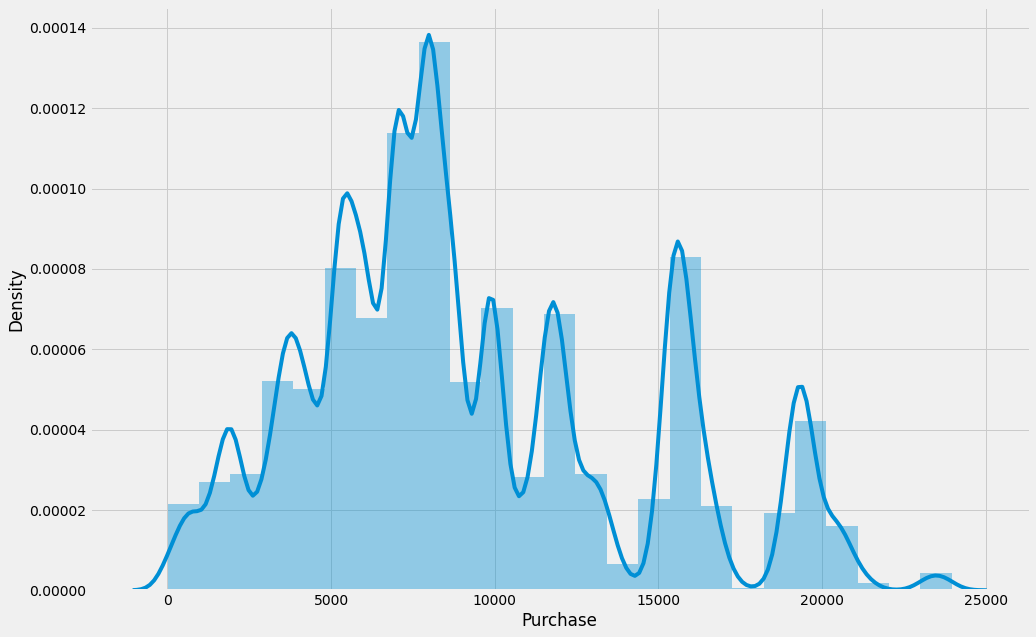

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
sns.distplot(df['Purchase'], bins=25)

Next we explore gender as a feature in the dataset by plotting the count of product purchases by males and females:

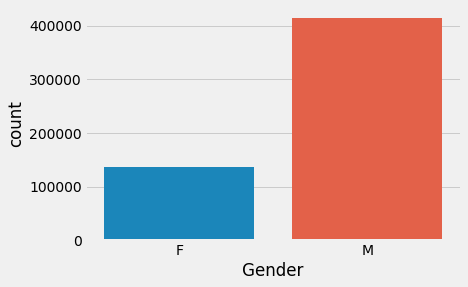

In [ ]:
# distribution of numeric variables
sns.countplot(df['Gender'])

Using customer gender information is a contentious topic that is still actively being debated by the data science community [REFERENCE]. For the purposes of this demonstration gender has been kept as a feature however, it is strongly advised that before developing such a model for a production setting that a privacy and ethics assessment is undertaken in according with the Australian government's AI Ethics Framework and 8 Ethics Principles [https://www.industry.gov.au/data-and-publications/australias-artificial-intelligence-ethics-framework/australias-ai-ethics-principles].

While this graph can be interpre shows males representing the majority of purchases it can be easily missunderstood. We must remember that the Purchase feature represents the total spent over the last month on a single product. This graph shows that males purchase a larger variety of products, however does not represent the actual **amount** that each gender spends.

To find the value of spend by males and females we use a simple sum and plot the collective purchase amount by gender:


In [ ]:
gender_df = df.groupby(["Gender"]).sum()
gender_df

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,
F,136234060927,915426,56988,776517,916139.0,468179.0,1186232642
M,415500008355,3527312,168349,2196199,2788809.0,1645150.0,3909580100


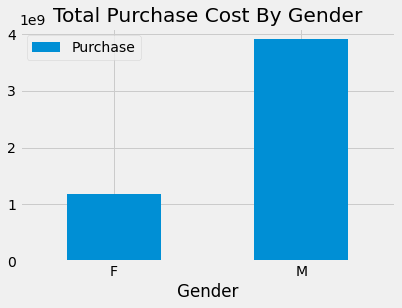

In [ ]:
ax = gender_df.plot.bar(y='Purchase', rot=0, title='Total Purchase Cost By Gender')

The above plot shows the total purchase cost by gender. The ratio of Purchase amount between females to males is approximately 1:3 and hence males are likely to spend more on Black Friday sales. Given this result gender can be safely assumed to be an important categorising factor in customer profile when predicting Purchase amounts.

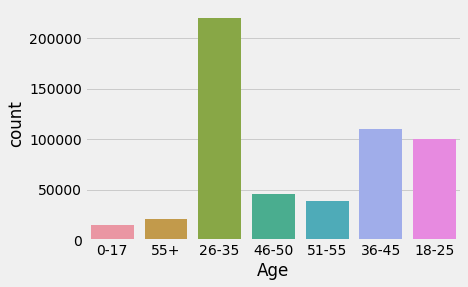

In [ ]:
sns.countplot(df['Age'])

There is a clear peak in the number of products purchased by 26-35 years old. Assuming that volume correlates with value we can say that there is an obvious target age group when looking to maximise sales.

We consider the marital status of customer by assuming that the value '0' represents 'single' while '1' represents married. As a sum single customers have historically purchased more products than married customers on Black Friday. Although this data is provided it is worth noting that in the real world this information is likely difficult to collect and is not something that can be easily inferred or requested from customers to provide. Regardless, for the purposes of this demonstration we will include the martial status as a feature for our recommendation and purchase prediction models. 

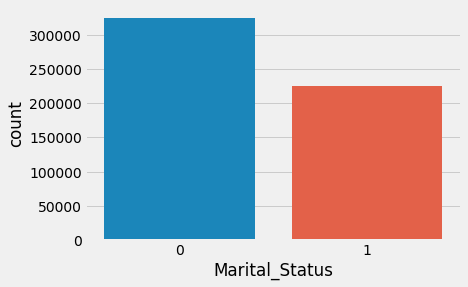

In [ ]:
sns.countplot(df['Marital_Status'])

During the data exploration phase we find a number of different categories that are masked/encoded without any context and hence they only provide us some minor insights.

These masked/encoded categories include:
- Occupation
- Product_Category_1
- Product_Category_2
- Product_Category_3
- City

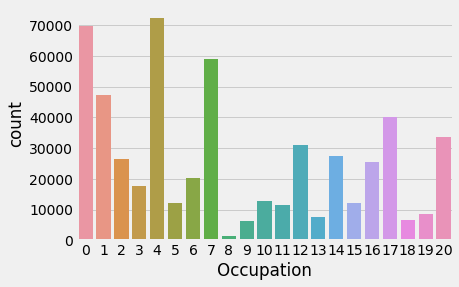

In [ ]:
sns.countplot(df['Occupation'])

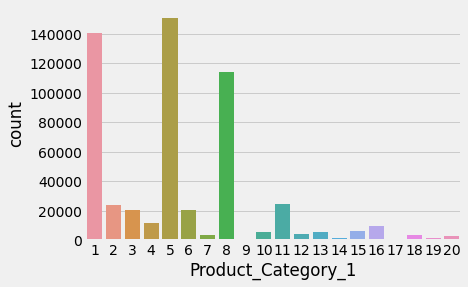

In [ ]:
sns.countplot(df['Product_Category_1'])

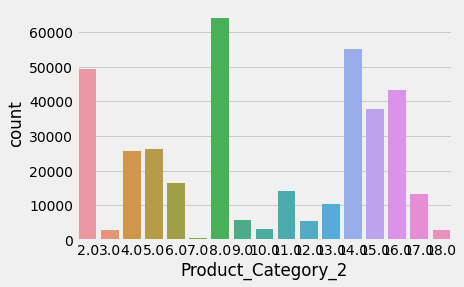

In [ ]:
sns.countplot(df['Product_Category_2'])

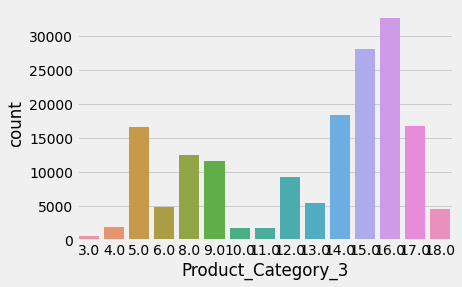

In [ ]:
sns.countplot(df['Product_Category_3'])

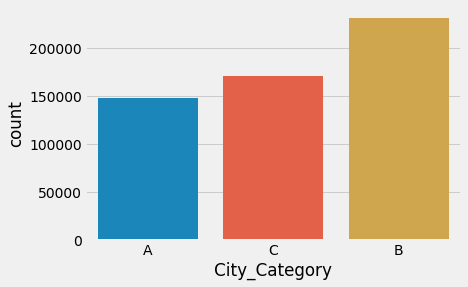

In [ ]:
sns.countplot(df['City_Category'])

Although there is limited context known about the city categories and their distribution, one of the tangible data points is on how long each customer has stayed in their current city. We imagine that information might be useful in the case that 'locals know the best deals'.

The plot below shows that the most common customer profile is of those that have only been in their current city for 1 year.

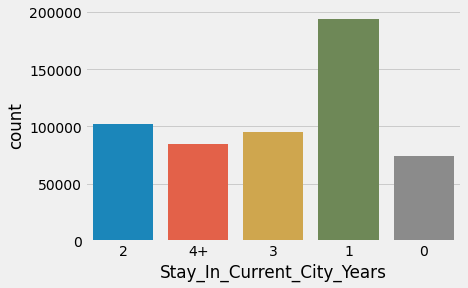

In [ ]:
sns.countplot(df['Stay_In_Current_City_Years'])

Understanding how features relate is a critical step in the ML process. We compare a variety of different features using bivariate analysis. 

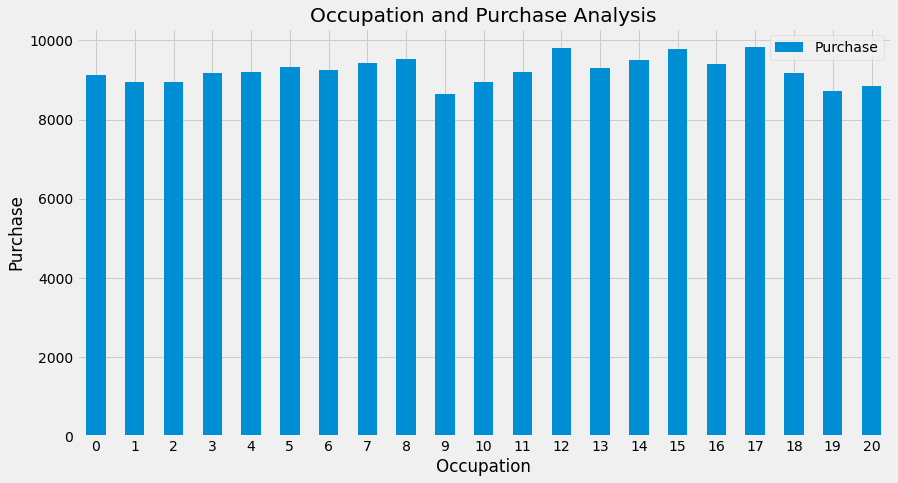

In [ ]:
# Bivariate Analysis
occupation_plot = df.pivot_table(index='Occupation',values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation and Purchase Analysis')
plt.xticks(rotation=0)
plt.show()

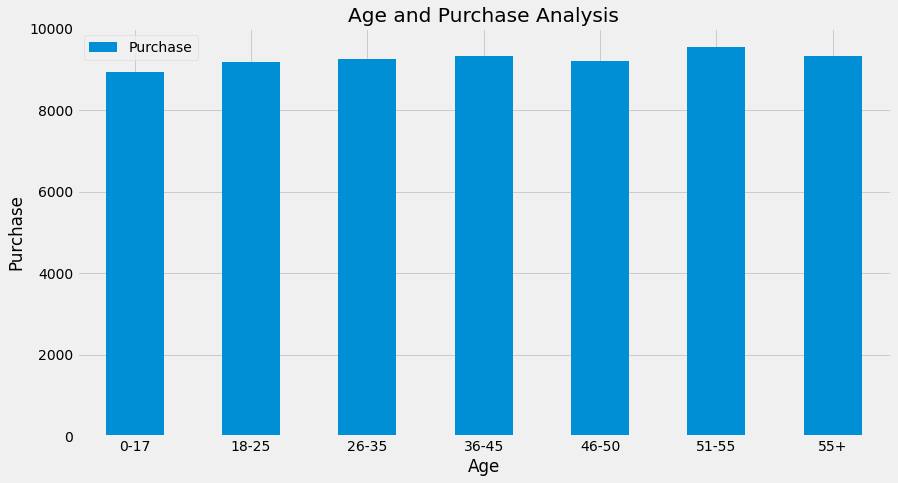

In [ ]:
age_plot = df.pivot_table(index='Age',values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age and Purchase Analysis')
plt.xticks(rotation=0)
plt.show()

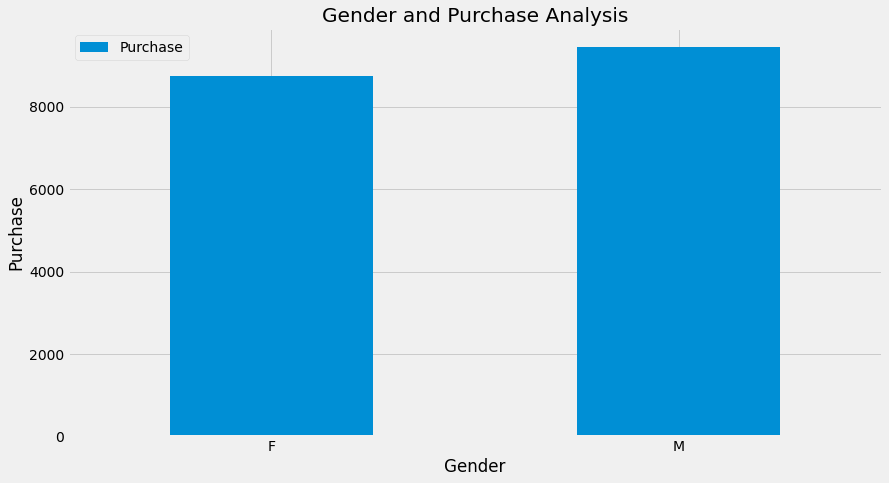

In [ ]:
gender_plot = df.pivot_table(index='Gender',values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title('Gender and Purchase Analysis')
plt.xticks(rotation=0)
plt.show()

Interesting from the bivariate analysis we find that occupation, age, and gender only lead to minor variations in purchases

## Correlation matrix

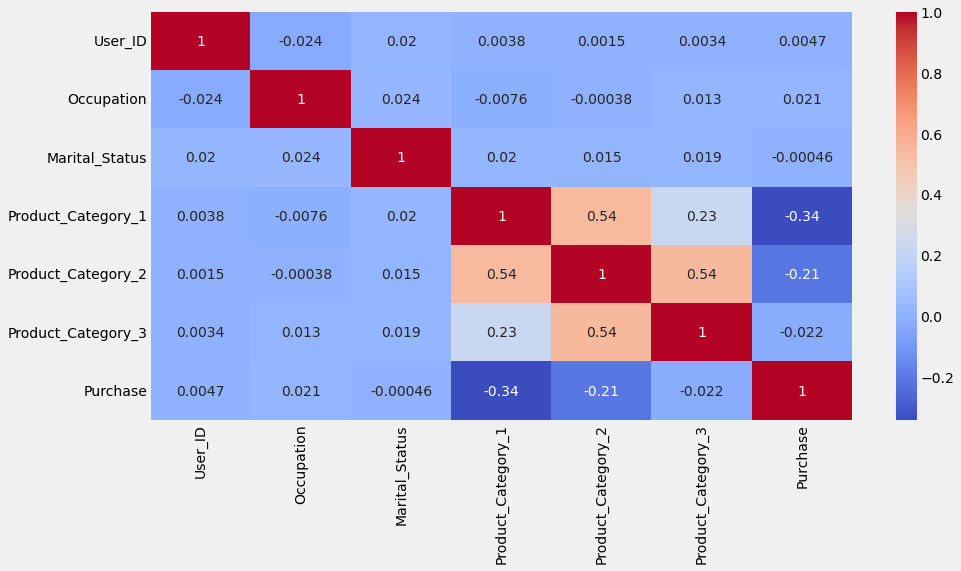

In [ ]:
corr = df.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the correlation heatmap, we can observe that the dependent feature ‘Purchase’ is highly correlated with ‘Product_Category_1’ and ‘Product_Category_2’ and hence these should be considered important features of the dataset.


## 3. Feature Engineering Decisions
```
Partners must describe the following:
What feature engineering was performed?
What features were selected for use in the ML model and why?

Evidence must include a description (in the Whitepaper) of the feature engineering performed (and rationale for the same), what original and engineered features were selected for incorporation as independent predictors in the ML model, and why. Evidence must include code snippets detailing the feature engineering and feature selection steps.
```

From the assesement of distributions and plots shown in section 2. The following features were used in the development and training of the models:
- 'Product_ID',
- 'Gender',
- 'Age',
- 'Occupation',
- 'City_Category', 
- 'Stay_In_Current_City_Years',
- 'Marital_Status',
- 'Product_Category_1',
- 'Product_Category_2',
- 'Purchase'

While the following categories were omitted:
- User ID
- Product Category 3

User ID was omitted as it was an arbitrary identifer. Product category 3 was omitted as it was shown in section 2 to have little correlation with the Purchase Amount



# 4. Preprocessing Pipeline
```
The partner must:
describe the data preprocessing pipeline, and 
how this is accomplished via a package/function that is a callable API (that is ultimately accessed by the served, production model).

Evidence must include a description (in the Whitepaper) of how data preprocessing is accomplished, along with the code snippet that accomplishes data preprocessing as a callable API.
```
Neural networks work better with one-hot encoded data compared to decision trees, which work better with value encoded categories. Two datasets have been made for each algorithm.

During the preprocessing stage, the categorical columns need to be converted to type 'category' in pandas. These columns are *Gender, Stay_In_Current_City_Years, City_Category, Product_Category_1, Product_Category_2, Product_ID*.

 This allows machine learning libraries to handle the data implicitely. Tensorflow still requires the categories to be encoded. There are multiple ways to encode this data. You can use SKlearn's encoding functionality however I have decided to use Pandas to reduce the number of libraries required.

In [ ]:
# Check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

To One-Hot encode the categorical data we can use Pandas pd.get_dummies() function. 

In [ ]:
df['Gender'] = df['Gender'].astype('category')

df_gender = pd.get_dummies(df['Gender'])
df_gender.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


.cat.codes returns an integer representing the category. These codes are only available if the column type is set to *category*.

In [ ]:
df['Age'] = df['Age'].astype('category').cat.codes
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

df_stay_in_currunt_city_years = pd.get_dummies(df['Stay_In_Current_City_Years'])
df_stay_in_currunt_city_years.head()

,0,1,2,3,4+
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [ ]:
df['City_Category'] = df['City_Category'].astype('category')

df_city_category = pd.get_dummies(df['City_Category'])
df_city_category.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
df['Product_Category_1'] = df['Product_Category_1'].astype('category')
df['Product_Category_1'] = df['Product_Category_1'].cat.codes
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,2,NaN,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,0,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,11,NaN,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,11,14.0,NaN,1057
4,1000002,P00285442,M,6,16,C,4+,0,7,NaN,NaN,7969


Since *Product_Category_2* has a number of null values we can either remove them from the dataset or replace with a value. This value is often the columns mean or medium value. When analysising the dataset you will find that each Product_ID has the same product categories. Product_Category_2 and Product_Category_3 are both subcategories and therefore may not exist. Since the product category 0 does not exist we will use value 0 to indicate this. Other values such as -1, -2 etc are also appropriate.

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(value=0)
df['Product_Category_2'].head()

0     0.0
1     6.0
2     0.0
3    14.0
4     0.0
Name: Product_Category_2, dtype: float64

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].astype('category')
df['Product_Category_2'] = df['Product_Category_2'].cat.codes
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,2,0,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,0,5,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,11,0,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,11,13,NaN,1057
4,1000002,P00285442,M,6,16,C,4+,0,7,0,NaN,7969


In [ ]:
df['Product_ID'] = df['Product_ID'].astype('category')
df['Product_ID'] = df['Product_ID'].cat.codes
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,F,0,10,A,2,0,2,0,NaN,8370
1,1000001,2376,F,0,10,A,2,0,0,5,14.0,15200
2,1000001,852,F,0,10,A,2,0,11,0,NaN,1422
3,1000001,828,F,0,10,A,2,0,11,13,NaN,1057
4,1000002,2734,M,6,16,C,4+,0,7,0,NaN,7969


In [ ]:
df_label_encoded = df.copy()
df_label_encoded['Gender'] = df_label_encoded['Gender'].cat.codes
df_label_encoded['Stay_In_Current_City_Years'] = df_label_encoded['Stay_In_Current_City_Years'].cat.codes
df_label_encoded['City_Category'] = df_label_encoded['City_Category'].cat.codes
df_label_encoded = df_label_encoded.drop(columns=['User_ID', 'Product_Category_3'])
df_label_encoded.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,0,0,10,0,2,0,2,0,8370
1,2376,0,0,10,0,2,0,0,5,15200
2,852,0,0,10,0,2,0,11,0,1422
3,828,0,0,10,0,2,0,11,13,1057
4,2734,1,6,16,2,4,0,7,0,7969


In [ ]:
df_one_hot_encoded = pd.concat([df, df_gender, df_city_category, df_stay_in_currunt_city_years], axis=1)
df_one_hot_encoded = df_one_hot_encoded.drop(columns=['User_ID', 'Gender', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_3', 'Purchase'])
df_one_hot_encoded.head()

,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,F,M,A,B,C,0,1,2,3,4+
0,672,0,10,0,2,0,1,0,1,0,0,0,0,1,0,0
1,2376,0,10,0,0,5,1,0,1,0,0,0,0,1,0,0
2,852,0,10,0,11,0,1,0,1,0,0,0,0,1,0,0
3,828,0,10,0,11,13,1,0,1,0,0,0,0,1,0,0
4,2734,6,16,0,7,0,0,1,0,0,1,0,0,0,0,1


Input split for recommendation system

In [ ]:
X = df_label_encoded.drop(columns=['Purchase'])
y = df['Purchase']

### Splitting the data
Splitting the dataset into training set and test sets. We will use 80% for training and 20% for testing. 

The random_state variable allows for repeatability.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Model Selection
```
Partners must describe the following:
- Which ML model/algorithm(s) were chosen for demo #2?
- What criteria were used for ML model selection?

Evidence must describe (in the Whitepaper) selection criteria implemented, as well as the specific ML model algorithms that were selected for training and evaluation purposes. Code snippets detailing the model design and selection steps must be enumerated.
```



To select an appropriate model we conduct an intial trade study between a variety of difference models. These vary in representation power, complexity and explainability:
1. Linear Regression
2. Decision Trees
3. Random Forrest
4. ExtraTreesRegressor
5. Decision Forrests
6. Artifical Neural Networks (ANN)
7. ANNs with Dropout

## 5.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

# predict the results
pred = model.predict(X_test)

# Cross validation
cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # 5 folds
cv_score = np.abs(np.mean(cv_score))

print('Results')
print('MSE:', mean_squared_error(y_test, pred))
print('CV Score:', cv_score)

Results
MSE: 21908818.262791455
CV Score: 21899241.340472754


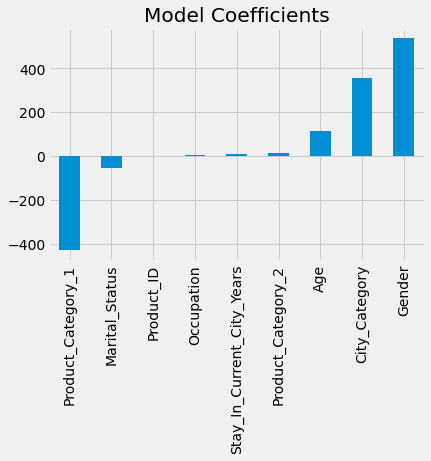

In [ ]:
coef = pd.Series(model.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

## 5.2 DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# predict the results
pred = model.predict(X_test)

# Cross validation
cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # 5 folds
cv_score = np.abs(np.mean(cv_score))

print('Results')
print('MSE:', mean_squared_error(y_test, pred))
print('CV Score:', cv_score)

Results
MSE: 13763002.433659507
CV Score: 13927471.812135542


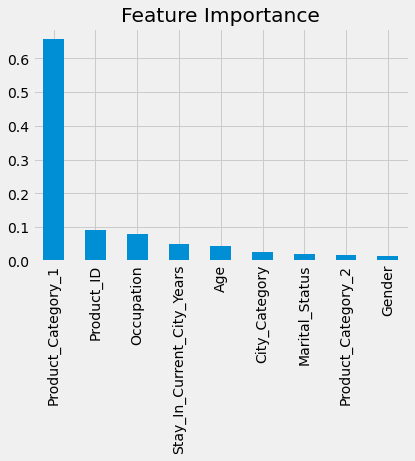

In [ ]:
features = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## 5.3 RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

# predict the results
pred = model.predict(X_test)

# Cross validation
cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # 5 folds
cv_score = np.abs(np.mean(cv_score))

print('Results')
print('MSE:', mean_squared_error(y_test, pred))
print('CV Score:', cv_score)

Results
MSE: 8222082.587040356
CV Score: 8304460.003578198


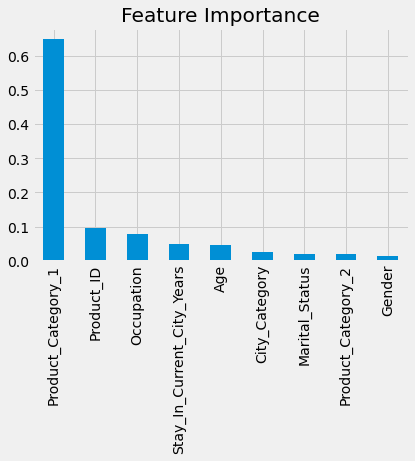

In [ ]:
features = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## 5.4 ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_jobs=-1)
model.fit(X_train, y_train)

# predict the results
pred = model.predict(X_test)

# Cross validation
cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # 5 folds
cv_score = np.abs(np.mean(cv_score))

print('Results')
print('MSE:', mean_squared_error(y_test, pred))
print('CV Score:', cv_score)

Results
MSE: 9245843.748726208
CV Score: 9300050.293706689


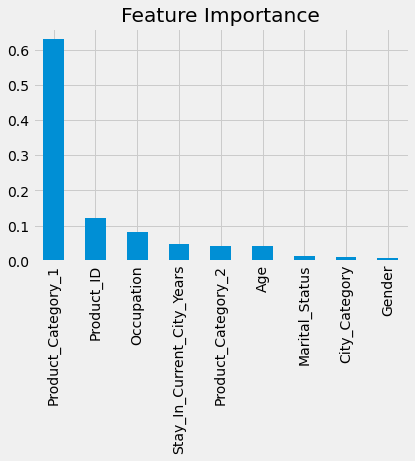

In [ ]:
features = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## 5.5 Decision Forests

In [ ]:
!pip install tensorflow_decision_forests

     |████████████████████████████████| 13.3 MB 4.7 MB/s 


In [ ]:
X = df_label_encoded
y = X['Purchase']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
401980,469,1,2,7,2,4,1,7,0,8109
368189,505,1,2,14,1,2,0,7,16,10071
181444,25,1,1,7,2,4,0,7,0,2290
238822,1522,1,1,20,0,4,1,4,7,6889
127422,1640,0,6,0,2,4,0,4,0,1820


In [ ]:
import tensorflow_decision_forests as tfdf

# Convert pandas dataset to tf dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label='Purchase', task=tfdf.keras.Task.REGRESSION)

tfdf_model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
tfdf_model.fit(train_ds)
tfdf_model.summary()

Use /tmp/tmpl72h9inu as temporary training directory
Starting reading the dataset
438/441 [============================>.] - ETA: 0s
Dataset read in 0:00:18.649498
Training model
Model trained in 0:04:32.286828
Compiling model
441/441 [==============================] - 305s 666ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (9):
	Age
	City_Category
	Gender
	Marital_Status
	Occupation
	Product_Category_1
	Product_Category_2
	Product_ID
	Stay_In_Current_City_Years

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.                    "__LABEL" 14.248914 ################
    2.             "Marital_Status" 13.328894 ##############
    3. "Stay_In_Current_City_Years" 11.

In [ ]:
tensorflow_forest_path = os.path.join("/content/drive/MyDrive/Black Friday Data/", "20220130-085959_tf_forest")

In [ ]:
tf.saved_model.save(tfdf_model, tensorflow_forest_path)

NameError: ignored

## 5.6 Artificial Neural Network

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Purchase]')
  plt.legend()
  plt.grid(True)  

In [ ]:
X = df_one_hot_encoded.drop(columns=['Purchase'])
y = df['Purchase']

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
ann = tf.keras.models.Sequential()

# Add input and first hidden layer
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add a second hidden layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Add a third hidden layer
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add an output layer
ann.add(tf.keras.layers.Dense(units=1))


In [ ]:
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0005), loss='mean_squared_error')

If we add split validation then we dont need to split the dataset before and gives us a cooler graph

In [ ]:
history = ann.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

In [ ]:
  # Save model
tf.saved_model.save(ann, export_path)

In [ ]:
plot_loss(history)

In [ ]:
dnn_results = ann.evaluate(
    X_test, y_test, verbose=0)
dnn_results

In [ ]:
test_predictions = ann.predict(X_test).flatten()
results = pd.DataFrame(test_predictions)
results['actual'] = pd.DataFrame(y_test)
results.head()

In [ ]:
y_test.head()

In [ ]:
results['ratio'] = results.apply(lambda row: row['dnn_128'] / row['actual'])
results['ratio'].mean()

## 5.7 Artificial Neural Network w/ Dropout

In [ ]:
dnn_with_dropout_path = os.path.join("/content/drive/MyDrive/Black Friday Data/", "20220120-085959_dnn_dropout")

In [ ]:
dnn_with_dropout = tf.keras.models.Sequential()

# Add input and first hidden layer
dnn_with_dropout.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add a second hidden layer
dnn_with_dropout.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Dropout layer
dnn_with_dropout.add(tf.keras.layers.Dropout(0.2))

# Add a third hidden layer
dnn_with_dropout.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add an output layer
dnn_with_dropout.add(tf.keras.layers.Dense(units=1))

In [ ]:
dnn_with_dropout.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0005), loss='mean_squared_error')

In [ ]:
with tf.device('/device:GPU:0'):
  history = dnn_with_dropout.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

In [ ]:
  # Save model
tf.saved_model.save(dnn_with_dropout, dnn_with_dropout_path)

In [ ]:
plot_loss(history)

The decision tree algorithms return the best results 

# 6. Model Training and Development
```
Partners must document the use of Cloud AI Platform or Dataproc for ML model training, and describe the following:
- Dataset sampling used for model training (and for dev/test independent datasets) and justification of sampling methods.
- Implementation of model training, including adherence to GCP best practices for distribution, device usage, and monitoring.
- The model evaluation metric that is implemented, and a discussion of why the implemented metric is optimal given the business question/goal being addressed.
- Hyper-parameter tuning and model performance optimization.
- How bias/variance were determined (from the train-dev datasets) and tradeoffs used to influence and optimize ML model architecture?
```

# 7. Model Deployment (only evidence)
```
Partners must:
provide proof that the ML model/application is deployed and served on GCP with Cloud AI Platform (or Endpoint) or Dataproc.

Evidence must include the Project Name and Project ID of the deployed ML model.
```

For deployment use Vertex AI and TFX notebooks. We deploy TFX on the kubeflow orchestrator. Evidence of the two deployed models (**product recommender**  and **price predictor**) can be found in the BlackFridayTFX notebooks.

# 8. Model Evaluation (only evidence)
```
Partners must describe: 
How the ML model, post-training, and architectural/hyperparameter optimization performs on an independent test dataset.

Evidence must include records/data (in the Whitepaper) of how the ML model developed and selected to address the business question performance on an independent test dataset (that reflects the distribution of data that the ML model is expected to encounter in a production environment). In addition, code snippets on model testing need to be enumerated.
```

# 9. Testing (only evidence)
```
Partners must:
Provide proof that the ML model/application is deployed and served on GCP with Cloud AI Platform or Kubeflow.
 demonstrate that the ML model for demo #1 is a callable library and/or application.

Evidence must include a demonstration of how the served model can be used to make a prediction via an API call

Evidence must include the Project Name and Project ID of the deployed cloud machine learning model and client.
```

# 10. Modifications (only evidence)
```
Partners must:
Demonstrate the deployed ML model is customizable.

Evidence must include a demonstration that the deployed model is fully functional after an appropriate code modification, as might be performed by a customer.
```